In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from simulation import *
from source import *
from aux_observation import *

In [2]:
filename_gamma = './dl2_gamma-diffuse_testing.h5'
filename_proton = './dl2_proton_testing.h5'

In [3]:
sim = simulation_object(filename_gamma, filename_proton)

In [4]:
src = source_object()

In [5]:
obs = observation(sim, src)

## Spatial Weights

In [6]:
src_disk = source_object(shape="disk")
src_gauss = source_object(shape="gauss")
src_ring = source_object(rmin=0.3*u.deg)

obs_disk = observation(sim, src_disk)
obs_gauss = observation(sim, src_gauss)
obs_ring = observation(sim, src_ring)

x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.3 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg


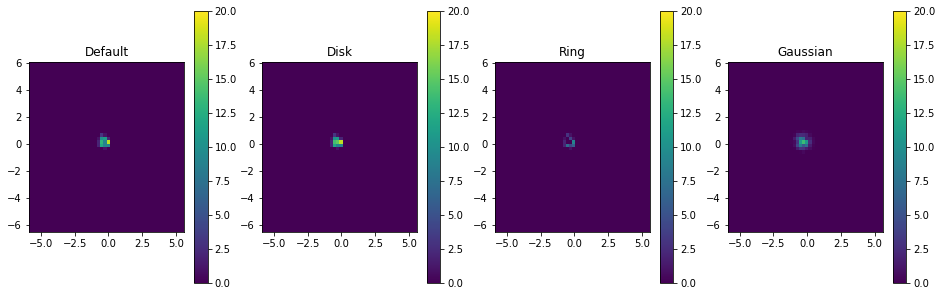

In [7]:
plt.figure(figsize=(16, 5))
plt.subplot(141, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= obs.spatial_weights(sim.cam_x, sim.cam_y),
    vmax=20
)
plt.title('Default')
plt.colorbar();

plt.subplot(142, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= obs_disk.spatial_weights(sim.cam_x, sim.cam_y),
    vmax=20
)
plt.title('Disk')
plt.colorbar();

plt.subplot(143, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= obs_ring.spatial_weights(sim.cam_x, sim.cam_y),
    vmax=20
)
plt.title('Ring')
plt.colorbar();

plt.subplot(144, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= obs_gauss.spatial_weights(sim.cam_x, sim.cam_y),
    vmax=20
)
plt.title('Gaussian')
plt.colorbar();

## Final Weight

In [8]:
binning = [0.01, 0.01547327, 0.023942209, 0.037046426, 0.057322935, 0.088697325, 0.13724377, 0.21236099, 
        0.32859189, 0.5084391, 0.78672155, 1.2173155, 1.8835851, 2.9145222, 4.5097188, 6.9780098, 10.797263, 16.706896, 
        25.851032, 40]
src_cutoff = source_object(spectrum_parameters = src.cutoff_spectrum_parameters) 
src_powerlaw = source_object(spectrum_parameters = src.powerlaw_spectrum_parameters)
obs_disk = observation(sim, src_disk)
obs_ring = observation(sim, src_ring)
obs_gauss = observation(sim, src_gauss)
obs_cutoff = observation(sim, src_cutoff)
obs_powerlaw = observation(sim, src_powerlaw)

x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.3 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg


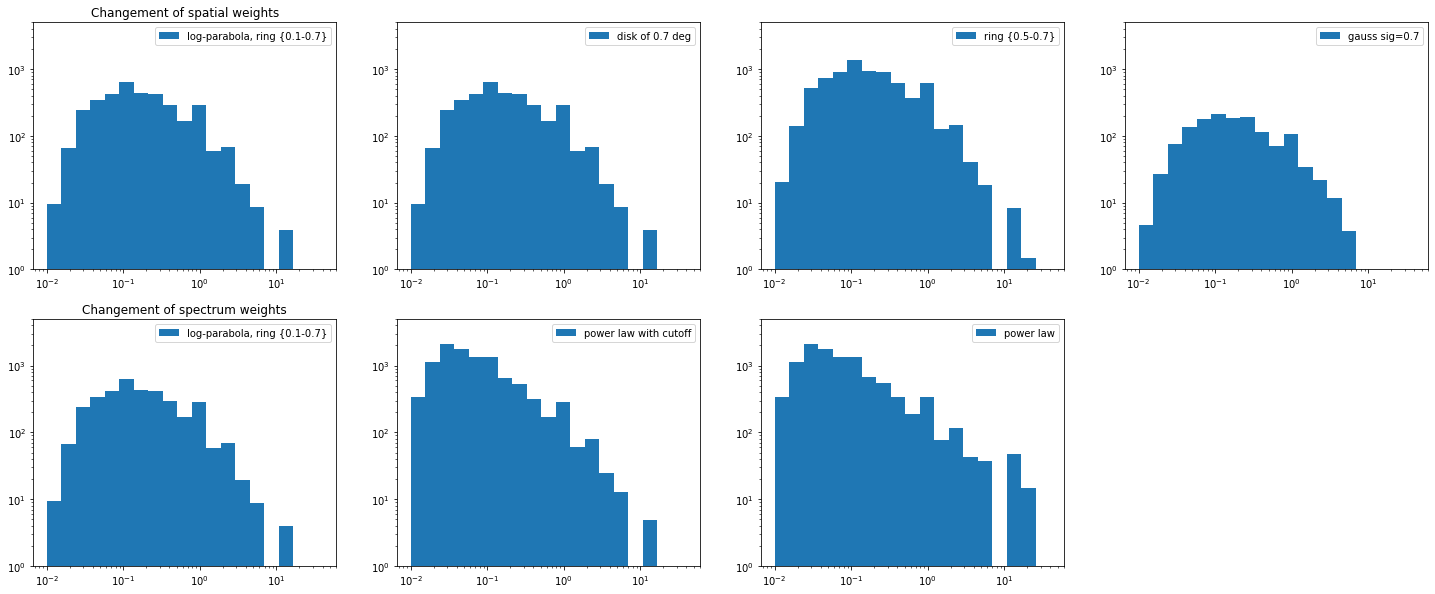

In [9]:
plt.figure(figsize=(25, 10))

plt.subplot(241)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs.weighting(),
    label="log-parabola, ring {0.1-0.7}"
)
plt.legend()
plt.ylim(1, 5000)
plt.title('Changement of spatial weights');

plt.subplot(242)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_disk.weighting(),
    label="disk of 0.7 deg"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(243)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_ring.weighting(),
    label="ring {0.5-0.7}"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(244)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_gauss.weighting(),
    label="gauss sig=0.7"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(245)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs.weighting(),
    label="log-parabola, ring {0.1-0.7}"
)
plt.ylim(1, 5000)
plt.legend()
plt.title('Changement of spectrum weights');

plt.subplot(246)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_cutoff.weighting(),
    label="power law with cutoff"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(247)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_powerlaw.weighting(),
    label="power law"
)
plt.ylim(1, 5000)
plt.legend();


x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.3 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg


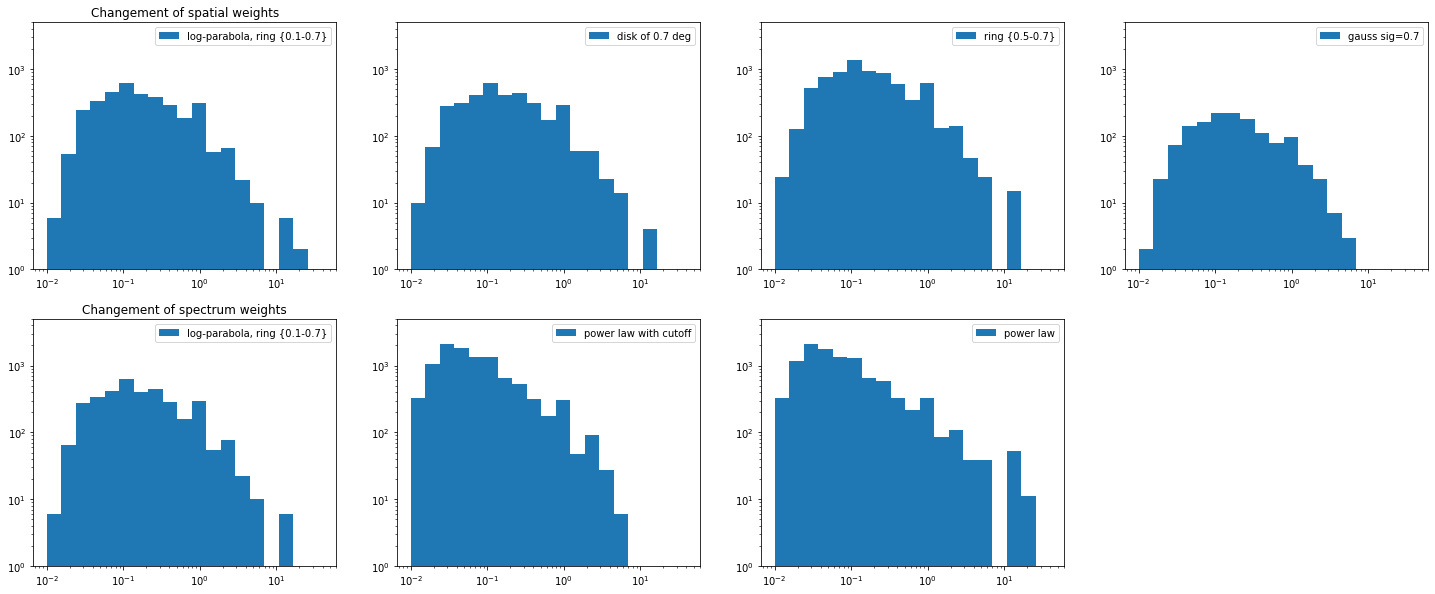

In [10]:
plt.figure(figsize=(25, 10))

plt.subplot(241)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="log-parabola, ring {0.1-0.7}"
)
plt.legend()
plt.ylim(1, 5000)
plt.title('Changement of spatial weights');

plt.subplot(242)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_disk.final_sim()['mc_energy'],
    bins= binning,
    label="disk of 0.7 deg"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(243)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_ring.final_sim()['mc_energy'],
    bins= binning,
    label="ring {0.5-0.7}"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(244)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_gauss.final_sim()['mc_energy'],
    bins= binning,
    label="gauss sig=0.7"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(245)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="log-parabola, ring {0.1-0.7}"
)
plt.ylim(1, 5000)
plt.legend()
plt.title('Changement of spectrum weights');

plt.subplot(246)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_cutoff.final_sim()['mc_energy'],
    bins= binning,
    label="power law with cutoff"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(247)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_powerlaw.final_sim()['mc_energy'],
    bins= binning,
    label="power law"
)
plt.ylim(1, 5000)
plt.legend();



### Data Frame of simulation data and background

In [11]:
obs_gauss.final_sim(write=True)
filename = './simulation.h5'
data = pd.read_hdf(filename, key='dl2/event/telescope/parameters/LST_LSTCam')
data

x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg


,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
2676,1012,434107,55.917973,1.747551,0.024992,-0.490707,0.491343,-1.519909,0.077327,0.005919,...,0.001461,-0.974000,12.823295,-0.125504,1.220124,3.040180,0,0.687667,0.000022,1.652663e+09
75,1001,501207,39.195877,1.593240,0.418143,-0.819590,0.920093,-1.099034,0.068440,0.005285,...,0.030083,-1.173430,-1.395705,-0.227840,1.220393,3.019240,101,0.418500,0.000145,1.652663e+09
1954,1008,1253508,161.608226,2.208463,-0.744505,-0.664137,0.997680,-2.413187,0.166447,0.005955,...,0.102615,-0.046630,17.500692,-0.416434,1.225391,3.136674,0,0.816667,0.000085,1.652663e+09
973,1002,511607,71.917652,1.856835,-0.060418,1.041168,1.042919,1.628761,0.073499,0.003595,...,-0.176744,0.375872,5.304409,-0.514450,1.215175,3.180156,101,0.441738,0.000002,1.652663e+09
1266,1002,2201300,178.944939,2.252719,-0.335750,-1.049463,1.101863,-1.880432,0.061847,0.004492,...,-0.097421,-1.354670,13.073253,1.007869,1.215080,3.002276,101,0.375250,0.000003,1.652663e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,1012,3906300,79.961824,1.902883,0.544962,-0.224410,0.589358,-0.390629,0.217511,0.009459,...,0.013293,-1.144557,22.415889,0.272838,1.219914,3.022421,0,0.627083,0.000068,1.652664e+09
1952,1008,1248105,363.959073,2.561053,0.108493,0.976630,0.982638,1.460160,0.158461,0.004575,...,0.049796,1.472354,3.922459,0.550549,1.219713,3.295021,101,0.470500,0.000030,1.652664e+09
70,1001,467607,474.383482,2.676130,-0.825768,-0.473732,0.952005,-2.620746,0.201632,0.005507,...,-0.072782,0.166931,14.979094,-0.590035,1.219083,3.158899,0,0.770000,0.000012,1.652664e+09
1249,1002,2093602,747.185152,2.873428,-0.418986,-0.624994,0.752441,-2.161368,0.167325,0.003899,...,-0.149526,-0.943523,5.319964,-0.094286,1.214856,3.044761,0,0.593500,0.000098,1.652664e+09


In [12]:
obs.final_background_sim(write=True)
name = './background.h5'
background = pd.read_hdf(name, key='dl2/event/telescope/parameters/LST_LSTCam')
background

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
317,1014,3612808,323.553765,2.509946,0.555833,-0.541726,0.776156,-0.772546,0.146378,0.004773,...,0.663113,-0.245059,-2.317727,0.191396,1.245301,3.114228,101,0.229167,0.000488,1.652663e+09
177,1003,7542401,62.740890,1.797551,-1.041091,-0.303931,1.084548,-2.857552,0.095561,0.004965,...,-1.276356,0.149226,8.068547,0.195601,1.176112,3.155439,0,0.514095,0.000007,1.652663e+09
502,1025,1423608,293.331133,2.467358,0.227528,-0.833030,0.863544,-1.304166,0.147186,0.005120,...,0.228311,-0.474468,0.372619,0.442401,1.229481,3.090951,101,0.479762,0.000005,1.652663e+09
418,1014,8057700,136.113302,2.133901,0.294533,-0.085037,0.306563,-0.281074,0.105790,0.004791,...,-0.024890,-0.066450,2.969265,0.401927,1.220834,3.134671,101,0.150000,0.000140,1.652663e+09
271,1014,2148205,396.320086,2.598046,0.739710,-0.392368,0.837331,-0.487698,0.196036,0.005238,...,0.471047,-0.584061,0.261990,0.478597,1.237927,3.077725,101,0.244631,0.000012,1.652663e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,1025,6798805,845.178139,2.926948,0.101664,-0.528798,0.538482,-1.380859,0.344195,0.006724,...,0.112411,-1.075137,-0.095020,-0.027088,1.223703,3.028501,101,0.033333,0.000012,1.652664e+09
397,1014,6966208,55.379473,1.743349,0.706929,-0.165802,0.726112,-0.230375,0.056625,0.007277,...,0.413932,-0.395161,8.652679,1.447069,1.236229,3.098606,101,0.310278,0.000171,1.652664e+09
409,1014,7373204,99.940620,1.999742,-0.838176,-0.509561,0.980914,-2.595356,0.071406,0.004639,...,-0.848433,-0.829287,2.743160,0.424519,1.190319,3.061803,101,0.236333,0.000006,1.652664e+09
684,1025,9763304,49.534101,1.694904,-0.314952,-0.153093,0.350189,-2.689140,0.059759,0.005798,...,-0.530038,-0.405233,10.004596,-0.620004,1.202527,3.101389,101,0.411667,0.000007,1.652664e+09


In [13]:
obs.total(write=True)
name = './dl2_LST-1.Run99999.h5'
total = pd.read_hdf(name, key='dl2/event/telescope/parameters/LST_LSTCam')
total

x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg


,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
3299,1012,3906305,3434.914389,3.535916,0.340162,-0.977337,1.034842,-1.235860,0.270032,0.003140,...,-0.034220,-1.260726,2.626963,0.741292,1.217744,3.011045,0,0.824643,0.000114,1.652663e+09
215,1003,9777006,215.808266,2.334068,0.474978,-0.921017,1.036280,-1.094660,0.121183,0.003713,...,0.192227,-0.929661,-0.494577,0.440281,1.227056,3.042934,101,0.342500,0.000083,1.652663e+09
546,1025,3343703,127.238656,2.104619,-0.444152,0.833949,0.944850,2.060174,0.099051,0.005238,...,-0.641437,1.080441,0.758335,0.149616,1.196903,3.247384,101,0.165000,0.000124,1.652663e+09
4,1003,291900,180.659358,2.256860,0.548346,-0.556637,0.781363,-0.792901,0.127330,0.004403,...,0.281665,-0.739014,2.800619,-0.056750,1.230807,3.062377,101,0.248000,0.000013,1.652663e+09
582,1025,5098509,58.754402,1.769040,-0.433011,-0.420407,0.603524,-2.370962,0.062361,0.006044,...,-0.224365,-0.225838,3.105556,0.998283,1.213630,3.118522,101,0.122333,0.000103,1.652663e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1014,5736902,56.312765,1.750607,-0.720285,-0.755901,1.044125,-2.332072,0.096156,0.006686,...,-1.289696,-0.499863,2.967826,0.424213,1.175281,3.095292,101,0.374000,0.000009,1.652664e+09
251,1014,1263808,193.340781,2.286323,0.723291,0.239483,0.761907,0.319741,0.103935,0.004584,...,0.598813,-0.027541,-3.912973,0.582338,1.243115,3.138537,101,0.406833,0.000026,1.652664e+09
514,1025,1913000,50.184528,1.700570,-0.582852,0.692929,0.905465,2.270125,0.054626,0.005515,...,-0.326196,1.024481,1.130206,-0.463869,1.208303,3.244927,101,0.292222,0.000028,1.652664e+09
3342,1012,4155009,238.779714,2.377997,0.197658,-0.035201,0.200768,-0.176244,0.126078,0.004773,...,-0.078137,0.236872,6.874832,-0.145711,1.218842,3.166135,0,0.626905,0.000028,1.652664e+09


### Calcul 

x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
x_0 = -0.3091500098520138 
 y_0 = 0.20483987143168217
rmax = 0.4 deg 
 rmin = 0.1 deg


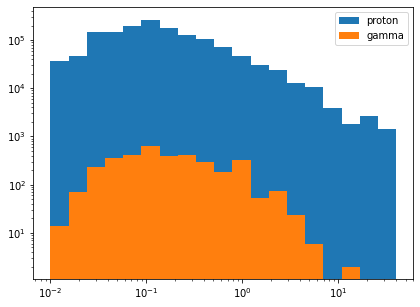

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy_proton.value,
    bins= binning,
    weights = obs.background_weighting(),
    label="proton"
)
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="gamma"
)
plt.legend();

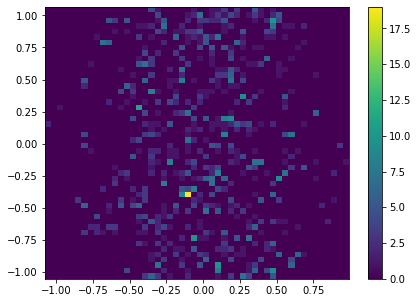

In [15]:
plt.figure(figsize=(15, 5))

x = list(data['x'])
y = list(data['y'])

plt.subplot(121)
plt.hist2d(
    x,
    y,
    bins=50,
)
plt.colorbar();